In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("image.jpg")

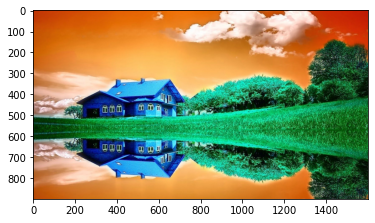

In [3]:
#original image
plt.imshow(img)

In [4]:
# negative image

In [5]:
L = img.max()
print(L)

255


In [6]:
image_negative = L - img

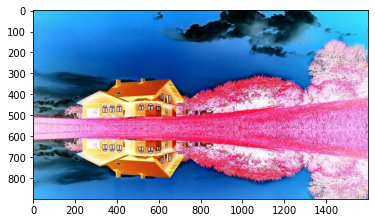

In [7]:
plt.imshow(image_negative)

In [8]:
#log transformation

In [9]:
import numpy as np

In [10]:
c = 255/np.log(1+np.max(img))
log_image = c*(np.log(img+1))

<ipython-input-10-4c6b436d4635>:2: RuntimeWarning: divide by zero encountered in log
  log_image = c*(np.log(img+1))


In [11]:
#converting float to integer
log_image = np.array(log_image,dtype=np.uint8)

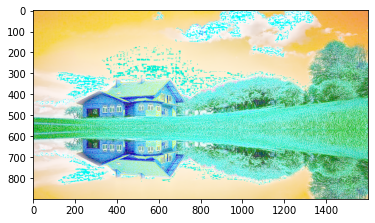

In [12]:
plt.imshow(log_image)

In [13]:
# threshold
# here we take lower bound = 100 and upper bound= 150 as thresold 

In [14]:
m,n,c = img.shape
print(img[3,4])

[190  53   4]


In [15]:
b,g,r = cv2.split(img)

In [16]:
l=100
u = 150

In [17]:
# applying threshold on blue plane
for i in range(m):
      
    for j in range(n):
        
        if l < b[i,j] < u:
            b[i,j] = 255

In [18]:
# applying threshold on greena nd red plane
for i in range(m):
      
    for j in range(n):
        
        if l < g[i,j] < u:
            g[i,j] = 255

for i in range(m):
      
    for j in range(n):
        
        if l < r[i,j] < u:
            r[i,j] = 255

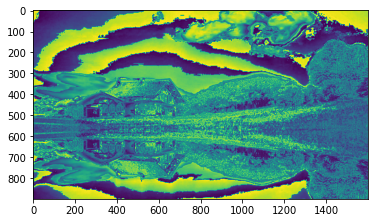

In [19]:
threshold_image = b+g+r
plt.imshow(threshold_image)

In [20]:
# bit slicing image

In [21]:
# convert the image into gray scale image
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# use bit manipulation for all the 8 bits which represent the color of gray scalw image to binary image
bit_slicing_image = [255 * ((gray_image& (1<<i)) >>i) for i in range(8)]

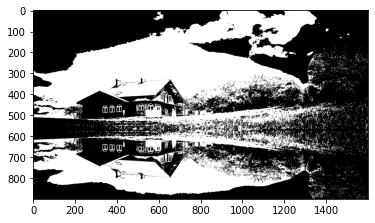

In [22]:
#plot the binary image
for i in range(8):
    plt.imshow(bit_slicing_image[i],cmap='gray')

In [23]:
#neighbourhood operations
# here neighbour size is 2 (n=2)
mx = gray_image[5:7,5:7].max()
gray_image[5:7,5:7] = mx - gray_image[5:7,5:7]

In [24]:
neighbour_image_max = gray_image
for i in range(m-2,2):
    for j in range(n-2,2):
        mx = neighbour_image_max[i:2,j:2].max()
        neighbour_image_max[i:2,j:2] = mx - neighbour_image_max[i:2,j:2]

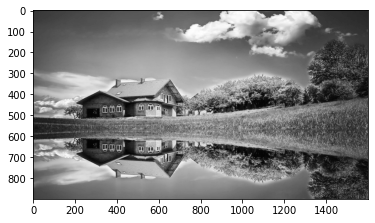

In [25]:
plt.imshow(neighbour_image_max,cmap='gray')

In [26]:
neighbour_image_med = gray_image
for i in range(m-2,2):
    for j in range(n-2,2):
        med = np.median(neighbour_image_med[i:2,j:2])
        neighbour_image_med[i:2,j:2] = med - neighbour_image_med[i:2,j:2]

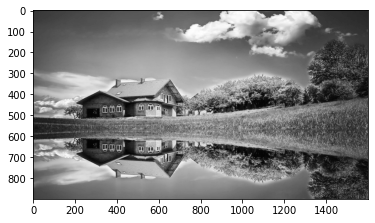

In [27]:
plt.imshow(neighbour_image_med,cmap='gray')

In [28]:
img1 = cv2.imread('img1.jpg')
img2 = cv2.imread('img2.jpg')

In [29]:
print(img1.shape)
print(img2.shape)

(1200, 1920, 3)
(1200, 1920, 3)


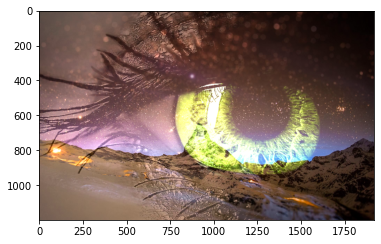

In [30]:
#aadition operation
add_img= cv2.add(img1,img2)
plt.imshow(add_img)

plt.imshow(add_img)

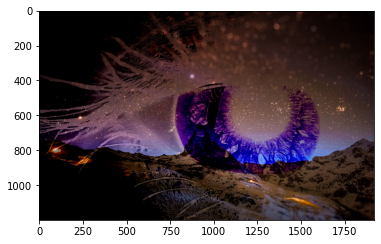

In [31]:
# subtract operation
sub_img = cv2.subtract(img1,img2)
plt.imshow(sub_img)

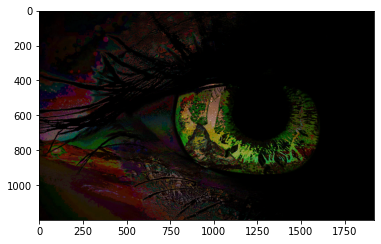

In [32]:
#logical opeartions
and_img = cv2.bitwise_and(img1,img2)
plt.imshow(and_img)

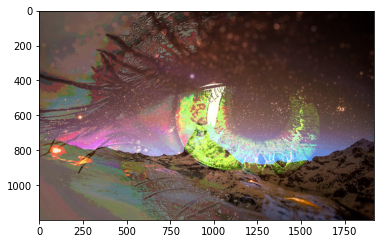

In [33]:
or_img = cv2.bitwise_or(img1,img2)
plt.imshow(or_img)

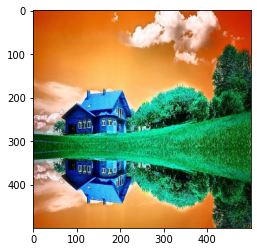

In [34]:
#geometrical operations
#zooming
zoom = cv2.resize(img, (500, 500),interpolation = cv2.INTER_NEAREST)
plt.imshow(zoom)

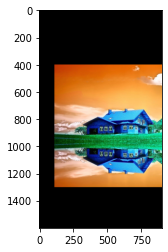

In [35]:
#image translation
half_height, half_width = n / 4, m / 8
  
T = np.float32([[1, 0, half_width], [0, 1,half_height]])
img_translation = cv2.warpAffine(img, T, (m, n))
plt.imshow(img_translation)

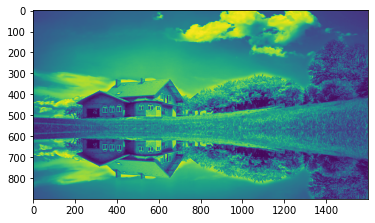

In [36]:
med = np.median(gray_image)
med_img = med + gray_image
plt.imshow(med_img)

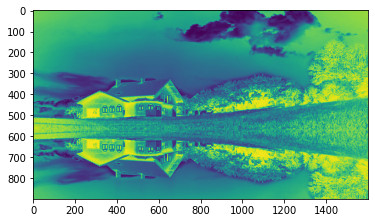

In [37]:
std = np.std(gray_image)
std_img = std-gray_image
plt.imshow(std_img)

In [38]:
print(std)
print(gray_image[0])

57.73686673590478
[52 52 52 ... 38 38 38]


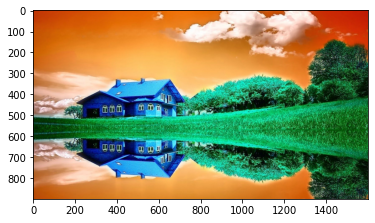

In [39]:
dim = (n,m)
resized = cv2.resize(img, dim, interpolation = cv2.INTER_MAX)
plt.imshow(resized)

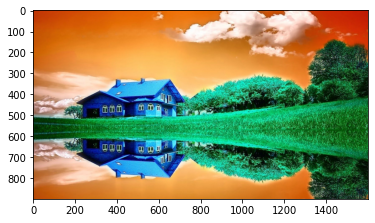

In [40]:
plt.imshow(img)

In [44]:
m,n,c = img.shape
img.max(),img.min()

(255, 0)

In [56]:
# A = pixel at (10,10)
# b = pixel at (20,20)
# v = 10 to 100


In [46]:
from collections import defaultdict
# converts from image matrix to m-adjacency list
def convert(a):
    adjList = defaultdict(list)
    for i in range(len(a)):
        for j in range(len(a[i])):
                       if a[i][j]== 1:
                           adjList[i].append(j)
    return adjList

In [58]:
image = cv2.imread("image.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [60]:
l = convert(gray_image)

In [61]:
l[255]

[]

In [62]:
l[192]

[1424]